# Случайное блуждание без отскока

Выбранное p = 0.61937
Параметры подгонки (обычная линейная регрессия):
  slope (a) = 0.194646, intercept (b) = 6.582687
Параметры ограничивающих прямых:
  Верхняя: slope = 0.194646, intercept = 15.065766  (добавлено R_max = 8.483080)
  Нижняя:  slope = 0.194646, intercept = -5.150688  (добавлено R_min = -11.733374)


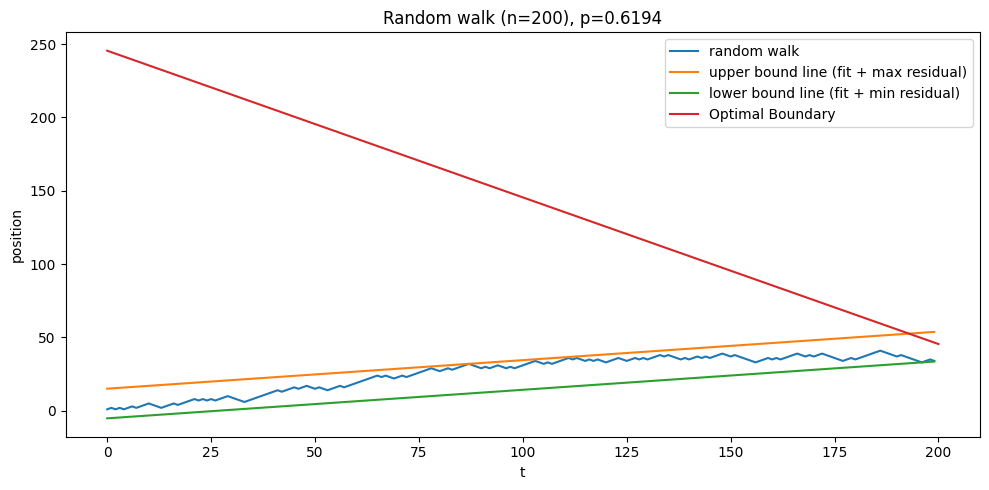

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = float(np.random.uniform(0.4, 0.6))
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


Выбранное p = 0.60610
Параметры подгонки (обычная линейная регрессия):
  slope (a) = 0.243840, intercept (b) = -13.202090
Параметры ограничивающих прямых:
  Верхняя: slope = 0.243840, intercept = 0.512320  (добавлено R_max = 13.714409)
  Нижняя:  slope = 0.243840, intercept = -22.923525  (добавлено R_min = -9.721436)


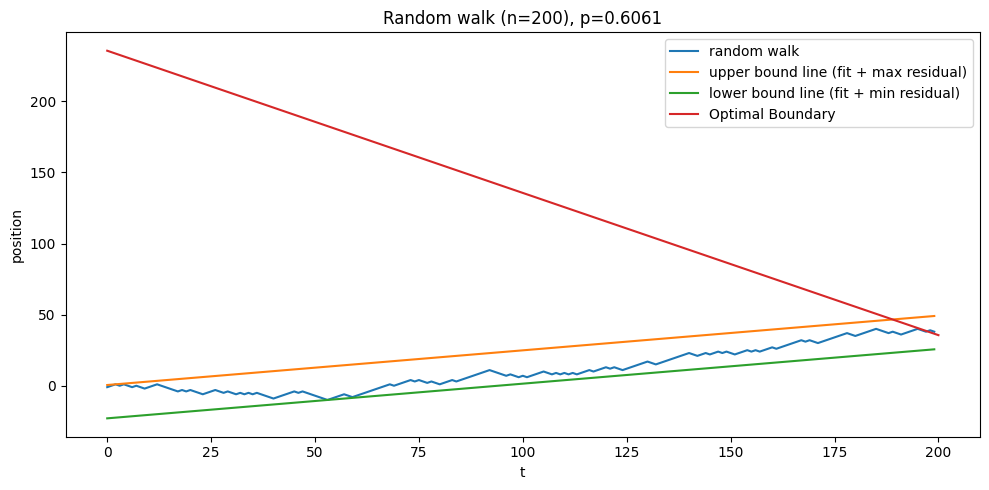

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = float(np.random.uniform(0.2, 0.8))  # случайное p в (0.2, 0.8)
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


Выбранное p = 0.45431
Параметры подгонки (обычная линейная регрессия):
  slope (a) = -0.243050, intercept (b) = 12.053433
Параметры ограничивающих прямых:
  Верхняя: slope = -0.243050, intercept = 21.478933  (добавлено R_max = 9.425501)
  Нижняя:  slope = -0.243050, intercept = -1.756950  (добавлено R_min = -13.810383)


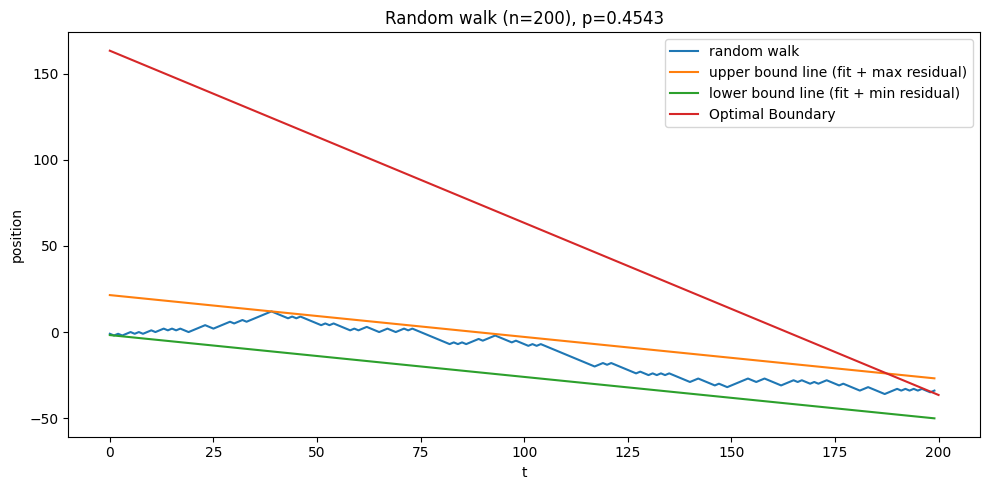

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = float(np.random.uniform(0.2, 0.8))  # случайное p в (0.2, 0.8)
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


Выбранное p = 0.71787
Параметры подгонки (обычная линейная регрессия):
  slope (a) = 0.421623, intercept (b) = 1.838507
Параметры ограничивающих прямых:
  Верхняя: slope = 0.421623, intercept = 6.361884  (добавлено R_max = 4.523377)
  Нижняя:  slope = 0.421623, intercept = -5.475812  (добавлено R_min = -7.314319)


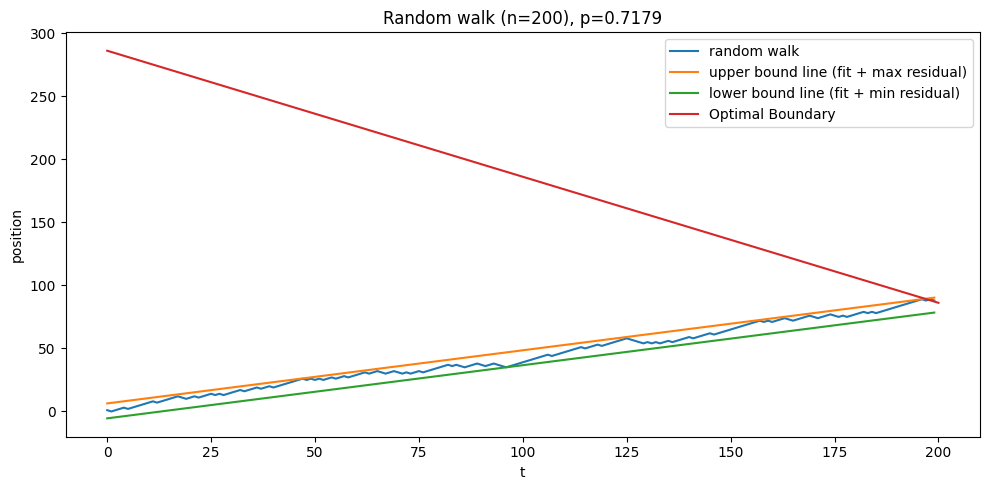

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = float(np.random.uniform(0.2, 0.8))  # случайное p в (0.2, 0.8)
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


Выбранное p = 0.50000
Параметры подгонки (обычная линейная регрессия):
  slope (a) = -0.073548, intercept (b) = 2.328060
Параметры ограничивающих прямых:
  Верхняя: slope = -0.073548, intercept = 10.029677  (добавлено R_max = 7.701617)
  Нижняя:  slope = -0.073548, intercept = -7.792263  (добавлено R_min = -10.120323)


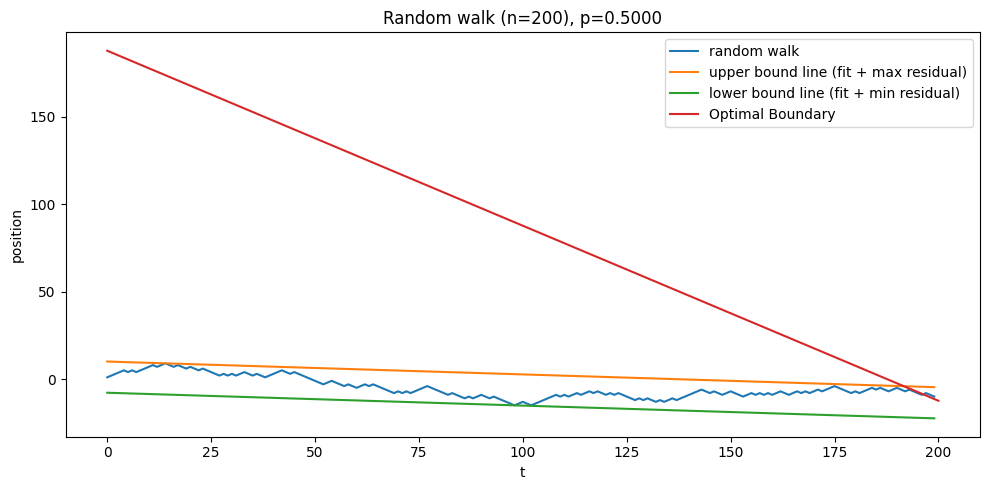

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = 0.5  # случайное p в (0.2, 0.8)
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


Выбранное p = 0.50000
Параметры подгонки (обычная линейная регрессия):
  slope (a) = -0.032014, intercept (b) = -1.914627
Параметры ограничивающих прямых:
  Верхняя: slope = -0.032014, intercept = 8.370746  (добавлено R_max = 10.285373)
  Нижняя:  slope = -0.032014, intercept = -10.909806  (добавлено R_min = -8.995179)


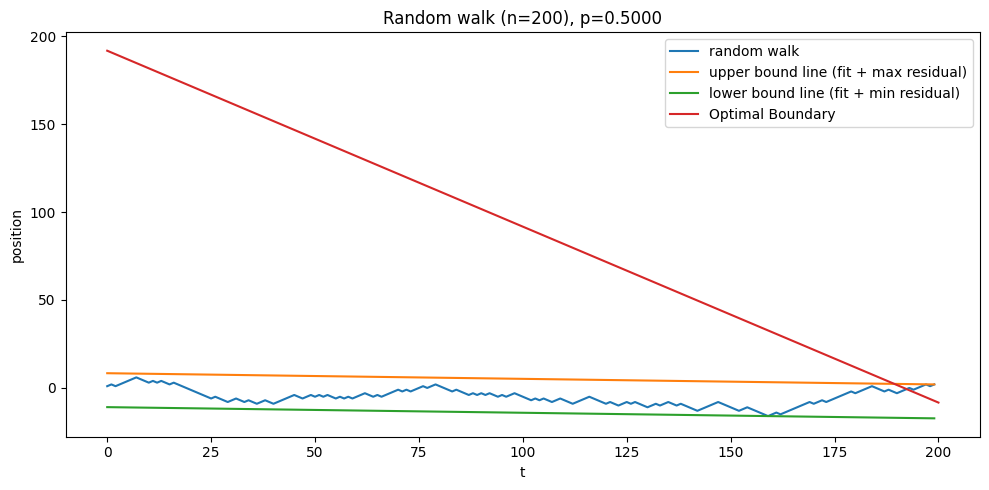

In [ ]:
# Синтез данных: сгенерируем смещённое случайное блуждание, подберём две прямые, которые ограничивают траекторию сверху и снизу,
# и отрисуем график. Результат — таблица первых строк, параметры прямых и график.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Параметры
n = 200  # длина траектории
p = 0.5  # случайное p в (0.2, 0.8)
# Сгенерируем шаги: +1 с вероятностью p, -1 с вероятностью 1-p
steps = np.where(np.random.rand(n) < p, 1, -1)
# Суммируем — получаем случайное блуждание (начинаем с 0)
positions = np.cumsum(steps)
x = np.arange(n)

# Подгоняем прямую y = a*x + b (метод наименьших квадратов)
a, b = np.polyfit(x, positions, 1)

# Остатки (residuals). Чтобы гарантированно ограничить все точки, возьмём верхнюю прямую как fit + max(resid),
# нижнюю — fit + min(resid).
residuals = positions - (a * x + b)
R_max = float(residuals.max())
R_min = float(residuals.min())

# Параметры верхней и нижней прямых
a_upper = a
b_upper = b + R_max
a_lower = a
b_lower = b + R_min

# Соберём DataFrame
df = pd.DataFrame({
    "t": x,
    "position": positions,
    "step": steps
})

# Выведем параметры и построим график
print(f"Выбранное p = {p:.5f}")
print("Параметры подгонки (обычная линейная регрессия):")
print(f"  slope (a) = {a:.6f}, intercept (b) = {b:.6f}")
print("Параметры ограничивающих прямых:")
print(f"  Верхняя: slope = {a_upper:.6f}, intercept = {b_upper:.6f}  (добавлено R_max = {R_max:.6f})")
print(f"  Нижняя:  slope = {a_lower:.6f}, intercept = {b_lower:.6f}  (добавлено R_min = {R_min:.6f})")

# График
plt.figure(figsize=(10, 5))
plt.plot(x, positions, label="random walk")
plt.plot(x, a_upper * x + b_upper, label="upper bound line (fit + max residual)")
plt.plot(x, a_lower * x + b_lower, label="lower bound line (fit + min residual)")

L_final = b_lower + a_lower*n
L_const = -(b + a_lower*n)  # L = -LN

# optimal stopping boundary
opt_boundary = np.array([n - L_const - t for t in range(n+1)])
plt.plot(opt_boundary, label="Optimal Boundary")
plt.xlabel("t")
plt.ylabel("position")
plt.title(f"Random walk (n={n}), p={p:.4f}")
plt.legend()
plt.tight_layout()
plt.show()


# Модель 2

Device: cpu
Dataset shapes: (640, 200, 6) (640, 200)
Computed pos_weight (neg/pos) = 6.2654
Epoch 01 | train_loss = 1.128605 | val_loss = 0.975710
Epoch 02 | train_loss = 0.990526 | val_loss = 0.883637
Epoch 03 | train_loss = 0.944718 | val_loss = 0.853425
Epoch 04 | train_loss = 0.926736 | val_loss = 0.836160
Epoch 05 | train_loss = 0.903284 | val_loss = 0.813648
Epoch 06 | train_loss = 0.868957 | val_loss = 0.771976
Epoch 07 | train_loss = 0.823147 | val_loss = 0.715816
Epoch 08 | train_loss = 0.771530 | val_loss = 0.708010
Epoch 09 | train_loss = 0.752435 | val_loss = 0.695591
Epoch 10 | train_loss = 0.752009 | val_loss = 0.695997
Epoch 11 | train_loss = 0.732940 | val_loss = 0.670124
Epoch 12 | train_loss = 0.718774 | val_loss = 0.660699
Epoch 13 | train_loss = 0.706983 | val_loss = 0.653992
Epoch 14 | train_loss = 0.690255 | val_loss = 0.654143
Epoch 15 | train_loss = 0.689853 | val_loss = 0.651995
Epoch 16 | train_loss = 0.692038 | val_loss = 0.645706
Epoch 17 | train_loss = 0.68

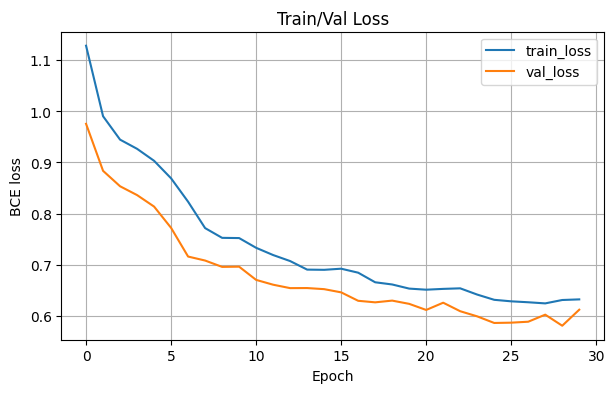

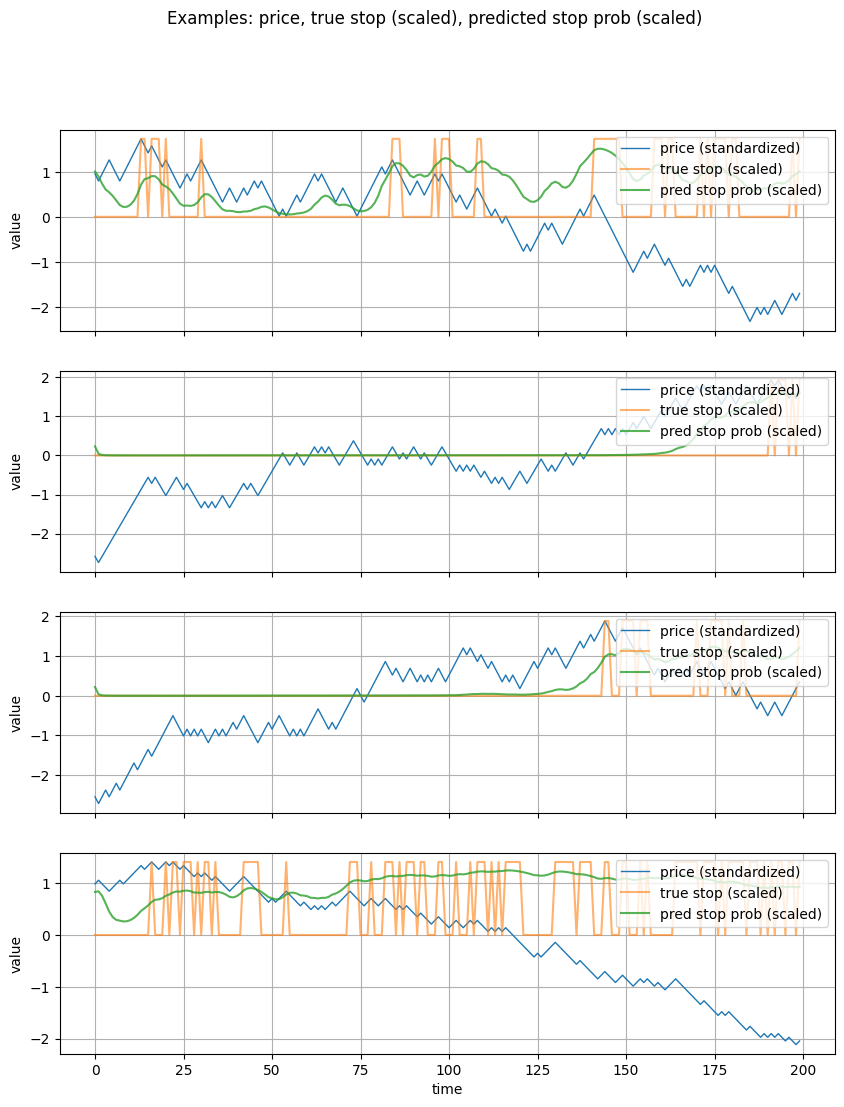

Done.


In [ ]:
"""
train_stop_model.py

Полный reproducible пример:
- генерирует датасет траекторий (по указанной тобой схеме: p ~ U(0.4,0.6), fit line, upper/lower)
- формирует признаки [price_t, time_to_end_norm, a_upper, b_upper, a_lower, b_lower]
- обучает GRU с BCEWithLogitsLoss (pos_weight для компенсации дисбаланса)
- строит графики train/val loss и пример предсказаний
"""

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# ---- Reproducibility ----
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)

# ---- Parameters ----
SEQ_LEN = 200           # длина траекторий (n)
N_PATHS = 640          # число траекторий (можно увеличить)
BATCH_SIZE = 64
EPOCHS = 30
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ---- Data generation functions ----
def generate_single_path(n=SEQ_LEN):
    """
    Генерирует одну траекторию и возвращает:
      positions: (n,) float
      features: (n, 6) - columns: price, time_left_norm, a_u, b_u, a_l, b_l
      y: (n,) binary target: 1 если positions[t] == max_future[t]
    """
    # генерируем p и шаги
    p = float(np.random.uniform(0.4, 0.6))
    steps = np.where(np.random.rand(n) < p, 1, -1)  # length n
    positions = np.cumsum(steps).astype(float)      # start at steps[0]
    x = np.arange(n)

    # подгоняем прямую (OLS)
    a, b = np.polyfit(x, positions, 1)
    residuals = positions - (a * x + b)
    R_max = float(residuals.max())
    R_min = float(residuals.min())

    # верхняя/нижняя прямые
    a_upper = a
    b_upper = b + R_max
    a_lower = a
    b_lower = b + R_min

    # target: 1 если текущая позиция == max over future
    max_future = np.maximum.accumulate(positions[::-1])[::-1]
    y = (positions == max_future).astype(float)

    # time left normalized: (T-1 - t) / (T-1)
    time_to_end = (n - 1 - x) / float(n - 1)

    # replicate a/b constants across time steps, but normalize them for stability
    # we'll scale a, b by typical magnitude
    # a's scale: divide by 1.0 (since a roughly O(0.0x)), b scale: divide by (abs(b)+1)
    # but simpler: center b by mean and scale by std of positions
    b_center = np.mean(positions)
    pos_std = np.std(positions) if np.std(positions) > 0 else 1.0

    a_u = np.full(n, a_upper, dtype=float)
    b_u = np.full(n, (b_upper - b_center) / pos_std, dtype=float)
    a_l = np.full(n, a_lower, dtype=float)
    b_l = np.full(n, (b_lower - b_center) / pos_std, dtype=float)

    # final features array (n, 6)
    features = np.stack([
        positions,         # raw price (could be large) -> we'll standardize later per-batch
        time_to_end,       # normalized time to end in [0,1]
        a_u,
        b_u,
        a_l,
        b_l
    ], axis=1)

    return positions, features, y


def build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN):
    all_X = []
    all_Y = []
    for _ in range(n_paths):
        pos, feats, y = generate_single_path(seq_len)
        # For stability, replace raw price by normalized price in feature 0:
        # normalize price by span mean to get similar magnitude
        # but we already include a/b normalized; do simple scaling: subtract mean and divide by std of positions
        pos_mean = pos.mean()
        pos_std = pos.std() if pos.std() > 0 else 1.0
        feats[:, 0] = (feats[:, 0] - pos_mean) / pos_std  # standardized price
        all_X.append(feats.astype(np.float32))
        all_Y.append(y.astype(np.float32))
    X = np.stack(all_X, axis=0)  # (N, T, 6)
    Y = np.stack(all_Y, axis=0)  # (N, T)
    return X, Y


# ---- Dataset class ----
class StopDataset(Dataset):
    def __init__(self, X, Y):
        # X: (N, T, F), Y: (N, T)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


# ---- Model: GRU (per-time-step logits) ----
class GRUStopper(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=64, num_layers=1, dropout=0.1):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=False, dropout=dropout if num_layers>1 else 0.0)
        self.head = nn.Linear(hidden_dim, 1)
        # optional small initialization
        nn.init.xavier_uniform_(self.head.weight)

    def forward(self, x):
        # x: (B, T, F)
        h, _ = self.gru(x)          # h: (B, T, hidden)
        logits = self.head(h)       # (B, T, 1)
        return logits.squeeze(-1)   # (B, T)


# ---- Training utilities ----
def compute_pos_weight(y_tensor):
    # y_tensor shape (N, T)
    y = y_tensor.reshape(-1)
    pos = float((y == 1.0).sum().item())
    neg = float((y == 0.0).sum().item())
    if pos == 0:
        return 1.0
    return neg / pos


def train_loop(model, loader, loss_fn, optimizer, device):
    model.train()
    running_loss = 0.0
    n_batches = 0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)               # (B, T)
        loss = loss_fn(logits, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        running_loss += loss.item()
        n_batches += 1
    return running_loss / max(1, n_batches)


def eval_loop(model, loader, loss_fn, device):
    model.eval()
    running_loss = 0.0
    n_batches = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            yb = yb.to(device)
            logits = model(xb)
            loss = loss_fn(logits, yb)
            running_loss += loss.item()
            n_batches += 1
    return running_loss / max(1, n_batches)


# ---- MAIN script ----
def main():
    print("Device:", DEVICE)
    X, Y = build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN)
    print("Dataset shapes:", X.shape, Y.shape)

    # train/val split
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=SEED)
    train_ds = StopDataset(X_train, Y_train)
    val_ds = StopDataset(X_val, Y_val)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

    # compute pos_weight from train set to balance BCE
    all_train_y = torch.tensor(Y_train)
    pos_weight_value = compute_pos_weight(all_train_y)
    print(f"Computed pos_weight (neg/pos) = {pos_weight_value:.4f}")

    # model, loss, optimizer
    model = GRUStopper(input_dim=X.shape[2], hidden_dim=64, num_layers=1).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_value).to(DEVICE))
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses = []
    val_losses = []

    for epoch in range(1, EPOCHS + 1):
        train_loss = train_loop(model, train_loader, loss_fn, optimizer, DEVICE)
        val_loss = eval_loop(model, val_loader, loss_fn, DEVICE)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch:02d} | train_loss = {train_loss:.6f} | val_loss = {val_loss:.6f}")

    # plot losses
    plt.figure(figsize=(7,4))
    plt.plot(train_losses, label="train_loss")
    plt.plot(val_losses, label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("BCE loss")
    plt.legend()
    plt.grid(True)
    plt.title("Train/Val Loss")
    plt.show()

    # ---- Example inference on held-out examples ----
    model.eval()
    # take several validation trajectories and plot predictions
    n_examples = 4
    examples_idx = np.random.choice(len(X_val), size=n_examples, replace=False)
    fig, axs = plt.subplots(n_examples, 1, figsize=(10, 3*n_examples), sharex=True)
    if n_examples == 1:
        axs = [axs]
    with torch.no_grad():
        for i, idx in enumerate(examples_idx):
            x_feats = X_val[idx:idx+1]                       # (1, T, F)
            y_true = Y_val[idx]                              # (T,)
            logits = model(torch.tensor(x_feats, dtype=torch.float32).to(DEVICE))[0].cpu().numpy()
            probs = 1.0 / (1.0 + np.exp(-logits))

            # show raw (standardized) price and true stops and predicted prob
            ax = axs[i]
            ax.plot(x_feats[0, :, 0], label="price (standardized)", linewidth=1)
            ax.plot(y_true * np.max(x_feats[0,:,0]), alpha=0.6, label="true stop (scaled)")
            ax.plot(probs * np.max(x_feats[0,:,0]), alpha=0.8, label="pred stop prob (scaled)")
            ax.set_ylabel("value")
            ax.legend(loc="upper right")
            ax.grid(True)
    axs[-1].set_xlabel("time")
    plt.suptitle("Examples: price, true stop (scaled), predicted stop prob (scaled)")
    plt.show()

    # Save model if needed
    # torch.save(model.state_dict(), "bigru_stopper.pt")
    print("Done.")


if __name__ == "__main__":
    main()


## еще запуск

Device: cpu
Dataset shapes: (640, 200, 6) (640, 200)
Computed pos_weight (neg/pos) = 6.2654
Epoch 01 | train_loss = 1.128605 | val_loss = 0.975710
Epoch 02 | train_loss = 0.990526 | val_loss = 0.883637
Epoch 03 | train_loss = 0.944718 | val_loss = 0.853425
Epoch 04 | train_loss = 0.926736 | val_loss = 0.836160
Epoch 05 | train_loss = 0.903284 | val_loss = 0.813648
Epoch 06 | train_loss = 0.868957 | val_loss = 0.771976
Epoch 07 | train_loss = 0.823147 | val_loss = 0.715816
Epoch 08 | train_loss = 0.771530 | val_loss = 0.708010
Epoch 09 | train_loss = 0.752435 | val_loss = 0.695591
Epoch 10 | train_loss = 0.752009 | val_loss = 0.695997
Epoch 11 | train_loss = 0.732940 | val_loss = 0.670124
Epoch 12 | train_loss = 0.718774 | val_loss = 0.660699
Epoch 13 | train_loss = 0.706983 | val_loss = 0.653992
Epoch 14 | train_loss = 0.690255 | val_loss = 0.654143
Epoch 15 | train_loss = 0.689853 | val_loss = 0.651995
Epoch 16 | train_loss = 0.692038 | val_loss = 0.645706
Epoch 17 | train_loss = 0.68

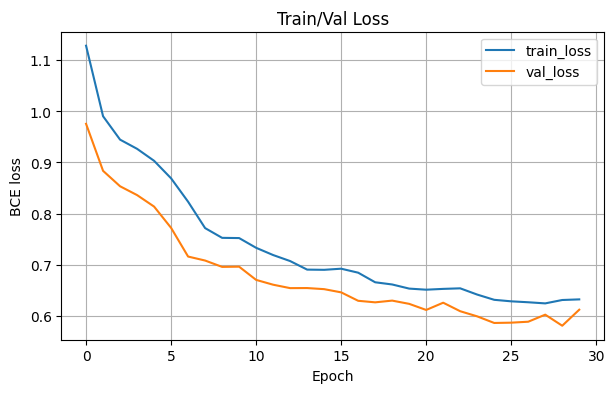

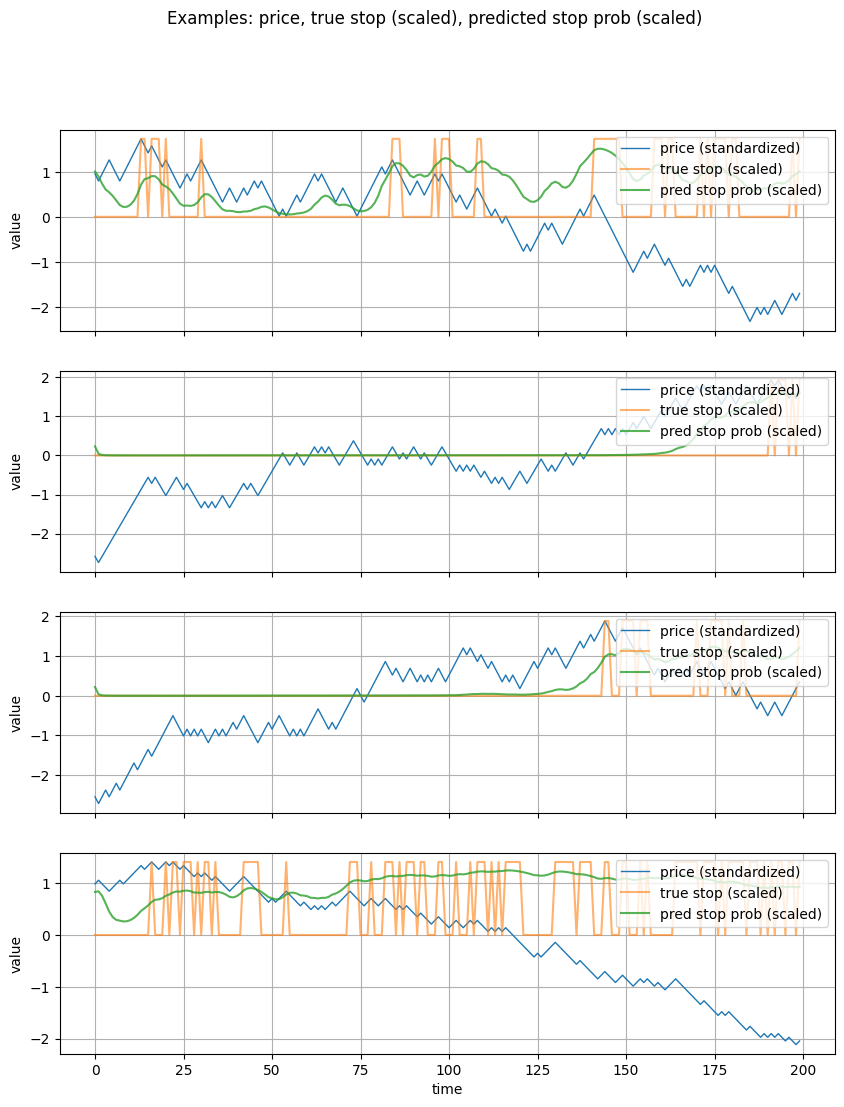

Done.


In [ ]:
"""
train_stop_model.py

Полный reproducible пример:
- генерирует датасет траекторий (по указанной тобой схеме: p ~ U(0.4,0.6), fit line, upper/lower)
- формирует признаки [price_t, time_to_end_norm, a_upper, b_upper, a_lower, b_lower]
- обучает GRU с BCEWithLogitsLoss (pos_weight для компенсации дисбаланса)
- строит графики train/val loss и пример предсказаний
"""

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

# ---- Reproducibility ----
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)

# ---- Parameters ----
SEQ_LEN = 200           # длина траекторий (n)
N_PATHS = 640          # число траекторий (можно увеличить)
BATCH_SIZE = 64
EPOCHS = 30
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ---- Data generation functions ----
def generate_single_path(n=SEQ_LEN):
    """
    Генерирует одну траекторию и возвращает:
      positions: (n,) float
      features: (n, 6) - columns: price, time_left_norm, a_u, b_u, a_l, b_l
      y: (n,) binary target: 1 если positions[t] == max_future[t]
    """
    # генерируем p и шаги
    p = float(np.random.uniform(0.4, 0.6))
    steps = np.where(np.random.rand(n) < p, 1, -1)  # length n
    positions = np.cumsum(steps).astype(float)      # start at steps[0]
    x = np.arange(n)

    # подгоняем прямую (OLS)
    a, b = np.polyfit(x, positions, 1)
    residuals = positions - (a * x + b)
    R_max = float(residuals.max())
    R_min = float(residuals.min())

    # верхняя/нижняя прямые
    a_upper = a
    b_upper = b + R_max
    a_lower = a
    b_lower = b + R_min

    # target: 1 если текущая позиция == max over future
    max_future = np.maximum.accumulate(positions[::-1])[::-1]
    y = (positions == max_future).astype(float)

    # time left normalized: (T-1 - t) / (T-1)
    time_to_end = (n - 1 - x) / float(n - 1)

    # replicate a/b constants across time steps, but normalize them for stability
    # we'll scale a, b by typical magnitude
    # a's scale: divide by 1.0 (since a roughly O(0.0x)), b scale: divide by (abs(b)+1)
    # but simpler: center b by mean and scale by std of positions
    b_center = np.mean(positions)
    pos_std = np.std(positions) if np.std(positions) > 0 else 1.0

    a_u = np.full(n, a_upper, dtype=float)
    b_u = np.full(n, (b_upper - b_center) / pos_std, dtype=float)
    a_l = np.full(n, a_lower, dtype=float)
    b_l = np.full(n, (b_lower - b_center) / pos_std, dtype=float)

    # final features array (n, 6)
    features = np.stack([
        positions,         # raw price (could be large) -> we'll standardize later per-batch
        time_to_end,       # normalized time to end in [0,1]
        a_u,
        b_u,
        a_l,
        b_l
    ], axis=1)

    return positions, features, y


def build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN):
    all_X = []
    all_Y = []
    for _ in range(n_paths):
        pos, feats, y = generate_single_path(seq_len)
        # For stability, replace raw price by normalized price in feature 0:
        # normalize price by span mean to get similar magnitude
        # but we already include a/b normalized; do simple scaling: subtract mean and divide by std of positions
        pos_mean = pos.mean()
        pos_std = pos.std() if pos.std() > 0 else 1.0
        feats[:, 0] = (feats[:, 0] - pos_mean) / pos_std  # standardized price
        all_X.append(feats.astype(np.float32))
        all_Y.append(y.astype(np.float32))
    X = np.stack(all_X, axis=0)  # (N, T, 6)
    Y = np.stack(all_Y, axis=0)  # (N, T)
    return X, Y


# ---- Dataset class ----
class StopDataset(Dataset):
    def __init__(self, X, Y):
        # X: (N, T, F), Y: (N, T)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


# ---- Model: GRU (per-time-step logits) ----
class GRUStopper(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=64, num_layers=1, dropout=0.1):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=False, dropout=dropout if num_layers>1 else 0.0)
        self.head = nn.Linear(hidden_dim, 1)
        # optional small initialization
        nn.init.xavier_uniform_(self.head.weight)

    def forward(self, x):
        # x: (B, T, F)
        h, _ = self.gru(x)          # h: (B, T, hidden)
        logits = self.head(h)       # (B, T, 1)
        return logits.squeeze(-1)   # (B, T)


# ---- Training utilities ----
def compute_pos_weight(y_tensor):
    # y_tensor shape (N, T)
    y = y_tensor.reshape(-1)
    pos = float((y == 1.0).sum().item())
    neg = float((y == 0.0).sum().item())
    if pos == 0:
        return 1.0
    return neg / pos


def train_loop(model, loader, loss_fn, optimizer, device):
    model.train()
    running_loss = 0.0
    n_batches = 0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)               # (B, T)
        loss = loss_fn(logits, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        running_loss += loss.item()
        n_batches += 1
    return running_loss / max(1, n_batches)


def eval_loop(model, loader, loss_fn, device):
    model.eval()
    running_loss = 0.0
    n_batches = 0
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            yb = yb.to(device)
            logits = model(xb)
            loss = loss_fn(logits, yb)
            running_loss += loss.item()
            n_batches += 1
    return running_loss / max(1, n_batches)


# ---- MAIN script ----
def main():
    print("Device:", DEVICE)
    X, Y = build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN)
    print("Dataset shapes:", X.shape, Y.shape)

    # train/val split
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=SEED)
    train_ds = StopDataset(X_train, Y_train)
    val_ds = StopDataset(X_val, Y_val)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

    # compute pos_weight from train set to balance BCE
    all_train_y = torch.tensor(Y_train)
    pos_weight_value = compute_pos_weight(all_train_y)
    print(f"Computed pos_weight (neg/pos) = {pos_weight_value:.4f}")

    # model, loss, optimizer
    model = GRUStopper(input_dim=X.shape[2], hidden_dim=64, num_layers=1).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_value).to(DEVICE))
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses = []
    val_losses = []

    for epoch in range(1, EPOCHS + 1):
        train_loss = train_loop(model, train_loader, loss_fn, optimizer, DEVICE)
        val_loss = eval_loop(model, val_loader, loss_fn, DEVICE)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch:02d} | train_loss = {train_loss:.6f} | val_loss = {val_loss:.6f}")

    # plot losses
    plt.figure(figsize=(7,4))
    plt.plot(train_losses, label="train_loss")
    plt.plot(val_losses, label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("BCE loss")
    plt.legend()
    plt.grid(True)
    plt.title("Train/Val Loss")
    plt.show()

    # ---- Example inference on held-out examples ----
    model.eval()
    # take several validation trajectories and plot predictions
    n_examples = 4
    examples_idx = np.random.choice(len(X_val), size=n_examples, replace=False)
    fig, axs = plt.subplots(n_examples, 1, figsize=(10, 3*n_examples), sharex=True)
    if n_examples == 1:
        axs = [axs]
    with torch.no_grad():
        for i, idx in enumerate(examples_idx):
            x_feats = X_val[idx:idx+1]                       # (1, T, F)
            y_true = Y_val[idx]                              # (T,)
            logits = model(torch.tensor(x_feats, dtype=torch.float32).to(DEVICE))[0].cpu().numpy()
            probs = 1.0 / (1.0 + np.exp(-logits))

            # show raw (standardized) price and true stops and predicted prob
            ax = axs[i]
            ax.plot(x_feats[0, :, 0], label="price (standardized)", linewidth=1)
            ax.plot(y_true * np.max(x_feats[0,:,0]), alpha=0.6, label="true stop (scaled)")
            ax.plot(probs * np.max(x_feats[0,:,0]), alpha=0.8, label="pred stop prob (scaled)")
            ax.set_ylabel("value")
            ax.legend(loc="upper right")
            ax.grid(True)
    axs[-1].set_xlabel("time")
    plt.suptitle("Examples: price, true stop (scaled), predicted stop prob (scaled)")
    plt.show()

    # Save model if needed
    # torch.save(model.state_dict(), "gru_stopper.pt")
    print("Done.")


if __name__ == "__main__":
    main()


## Метрики

Device: cpu
Shapes X,Y,POS: (500, 200, 6) (500, 200) (500, 200)
pos_weight (neg/pos) = 6.530
Epoch 01 | train_loss=1.145133 | val_loss=1.084169
Epoch 02 | train_loss=1.048000 | val_loss=1.018919
Epoch 03 | train_loss=0.990058 | val_loss=0.979071
Epoch 04 | train_loss=0.947168 | val_loss=0.956046
Epoch 05 | train_loss=0.927000 | val_loss=0.936915
Epoch 06 | train_loss=0.921976 | val_loss=0.919906
Epoch 07 | train_loss=0.894792 | val_loss=0.905572
Epoch 08 | train_loss=0.889157 | val_loss=0.889736
Epoch 09 | train_loss=0.874450 | val_loss=0.874902
Epoch 10 | train_loss=0.854203 | val_loss=0.851730
Epoch 11 | train_loss=0.831999 | val_loss=0.829723
Epoch 12 | train_loss=0.796870 | val_loss=0.798993
Epoch 13 | train_loss=0.773377 | val_loss=0.770127
Epoch 14 | train_loss=0.750614 | val_loss=0.743415
Epoch 15 | train_loss=0.730301 | val_loss=0.733255
Epoch 16 | train_loss=0.735559 | val_loss=0.729374
Epoch 17 | train_loss=0.711827 | val_loss=0.749383
Epoch 18 | train_loss=0.714475 | val_los

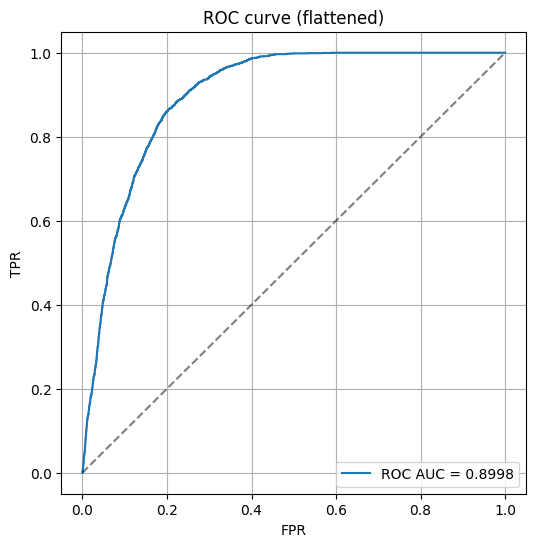

Validation max profit mean = 14.4000, median = 8.0000


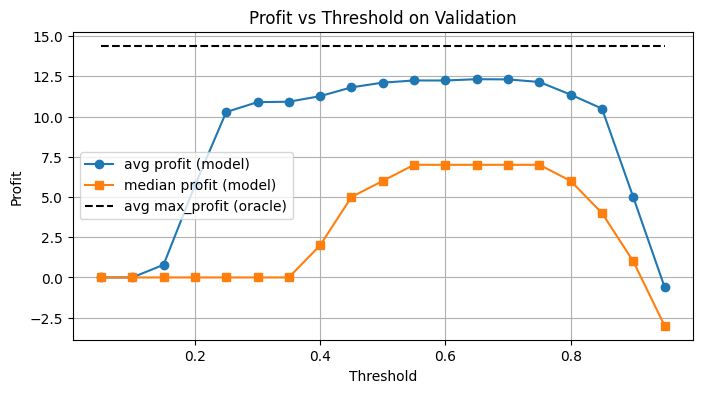

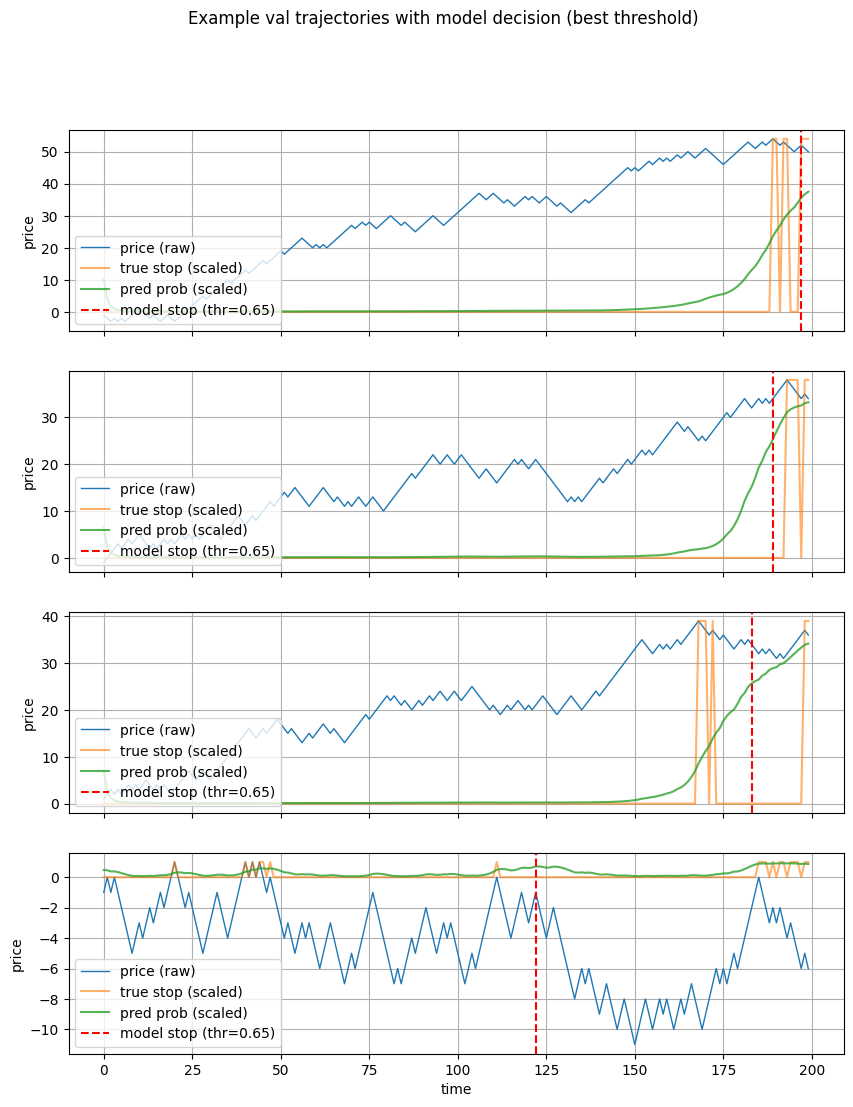

Done.


In [ ]:
"""
train_eval_gru_profit.py

- causal single-direction GRU (hidden_size=32), 6 features per timestep
- BCEWithLogitsLoss with pos_weight balancing
- computes on validation:
    * ROC AUC
    * Precision/Recall/F1 for thresholds
    * average profit per threshold (model decision: first t with prob>=thr, else T-1)
    * plots: ROC curve, Profit vs Threshold, F1 vs Threshold
"""

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support
import matplotlib.pyplot as plt
import random
import os

# reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# hyperparams
SEQ_LEN = 200
N_PATHS = 500
BATCH_SIZE = 64
EPOCHS = 30
LR = 1e-3
HIDDEN_SIZE = 32
NUM_LAYERS = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------- data generation (same as before) ----------------
def generate_single_path(n=SEQ_LEN):
    p = float(np.random.uniform(0.4, 0.6))
    steps = np.where(np.random.rand(n) < p, 1, -1)
    positions = np.cumsum(steps).astype(float)
    x = np.arange(n)
    a, b = np.polyfit(x, positions, 1)
    residuals = positions - (a * x + b)
    R_max = float(residuals.max())
    R_min = float(residuals.min())
    a_upper = a
    b_upper = b + R_max
    a_lower = a
    b_lower = b + R_min
    upper = a_upper * x + b_upper
    lower = a_lower * x + b_lower
    span = upper - lower
    span[span == 0] = 1.0
    max_future = np.maximum.accumulate(positions[::-1])[::-1]
    y = (positions == max_future).astype(float)
    pos_mean = positions.mean()
    pos_std = positions.std() if positions.std() > 1e-6 else 1.0
    price_std = (positions - pos_mean) / pos_std
    time_left = (n - 1 - x) / float(n - 1)
    a_u = np.full(n, a_upper, dtype=float)
    b_u = np.full(n, (b_upper - pos_mean) / pos_std, dtype=float)
    a_l = np.full(n, a_lower, dtype=float)
    b_l = np.full(n, (b_lower - pos_mean) / pos_std, dtype=float)
    features = np.stack([price_std, time_left, a_u, b_u, a_l, b_l], axis=1).astype(np.float32)
    return positions.astype(float), features, y.astype(np.float32)

def build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN):
    X_list = []
    Y_list = []
    POS_list = []
    for _ in range(n_paths):
        positions, feats, y = generate_single_path(seq_len)
        X_list.append(feats)
        Y_list.append(y)
        POS_list.append(positions)
    X = np.stack(X_list, axis=0)
    Y = np.stack(Y_list, axis=0)
    POS = np.stack(POS_list, axis=0)
    return X, Y, POS

class StopDataset(Dataset):
    def __init__(self, X, Y, POS):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
        self.POS = torch.tensor(POS, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx], self.POS[idx]

# ---------------- model ----------------
class GRUStopper(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=HIDDEN_SIZE, num_layers=NUM_LAYERS):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=False)
        self.head = nn.Linear(hidden_dim, 1)
        nn.init.xavier_uniform_(self.head.weight)
        nn.init.zeros_(self.head.bias)

    def forward(self, x):
        out, _ = self.gru(x)      # (B, T, hidden)
        logits = self.head(out)   # (B, T, 1)
        return logits.squeeze(-1) # (B, T)

# ---------------- training utils ----------------
def compute_pos_weight(y_array):
    y_flat = y_array.reshape(-1)
    pos = float((y_flat == 1.0).sum())
    neg = float((y_flat == 0.0).sum())
    if pos == 0:
        return 1.0
    return neg / pos

def train_one_epoch(model, loader, loss_fn, optimizer, device):
    model.train()
    tot_loss = 0.0
    nb = 0
    for xb, yb, _ in loader:
        xb = xb.to(device); yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        tot_loss += loss.item()
        nb += 1
    return tot_loss / max(1, nb)

def eval_one_epoch(model, loader, loss_fn, device):
    model.eval()
    tot_loss = 0.0
    nb = 0
    all_logits = []
    all_targets = []
    all_positions = []
    with torch.no_grad():
        for xb, yb, pos in loader:
            xb = xb.to(device); yb = yb.to(device)
            logits = model(xb)
            loss = loss_fn(logits, yb)
            tot_loss += loss.item()
            nb += 1
            all_logits.append(logits.cpu().numpy())  # (B, T)
            all_targets.append(yb.cpu().numpy())
            all_positions.append(pos.numpy())
    all_logits = np.concatenate(all_logits, axis=0)    # (Nval, T)
    all_targets = np.concatenate(all_targets, axis=0)  # (Nval, T)
    all_positions = np.concatenate(all_positions, axis=0)# (Nval, T)
    return tot_loss / max(1, nb), all_logits, all_targets, all_positions

# ---------------- decision & profit helpers ----------------
def decide_first_stop(probs_row, threshold):
    """
    probs_row: (T,) array of probabilities for a single trajectory
    returns chosen index t (int), using rule A: first t where prob >= threshold,
    else T-1
    """
    idxs = np.where(probs_row >= threshold)[0]
    if idxs.size == 0:
        return probs_row.shape[0] - 1
    return int(idxs[0])

def compute_profits_for_threshold(all_probs, all_positions, threshold):
    """
    all_probs: (N, T) probabilities
    all_positions: (N, T) raw positions (not standardized)
    returns profits: length-N array of (price_at_decision - price_at_0)
    """
    N, T = all_probs.shape
    profits = np.zeros(N, dtype=float)
    chosen_idxs = np.zeros(N, dtype=int)
    for i in range(N):
        t = decide_first_stop(all_probs[i], threshold)
        chosen_idxs[i] = t
        profits[i] = all_positions[i, t] - all_positions[i, 0]
    return profits, chosen_idxs

# ---------------- main ----------------
def main():
    print("Device:", DEVICE)
    # build dataset
    X, Y, POS = build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN)
    print("Shapes X,Y,POS:", X.shape, Y.shape, POS.shape)

    X_train, X_val, Y_train, Y_val, POS_train, POS_val = train_test_split(
        X, Y, POS, test_size=0.15, random_state=SEED
    )

    train_ds = StopDataset(X_train, Y_train, POS_train)
    val_ds = StopDataset(X_val, Y_val, POS_val)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

    pos_weight_val = compute_pos_weight(Y_train)
    print(f"pos_weight (neg/pos) = {pos_weight_val:.3f}")

    model = GRUStopper(input_dim=X.shape[2], hidden_dim=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_val, dtype=torch.float32).to(DEVICE))
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses = []
    val_losses = []

    for epoch in range(1, EPOCHS+1):
        tr_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, DEVICE)
        val_loss, all_logits, all_targets, all_positions = eval_one_epoch(model, val_loader, loss_fn, DEVICE)
        train_losses.append(tr_loss); val_losses.append(val_loss)
        scheduler.step(val_loss)
        print(f"Epoch {epoch:02d} | train_loss={tr_loss:.6f} | val_loss={val_loss:.6f}")

    # convert logits -> probs for val
    val_probs = 1.0 / (1.0 + np.exp(-all_logits))  # (Nval, T)
    val_targets = all_targets  # (Nval, T)
    val_positions = all_positions  # (Nval, T)

    # ROC AUC (flattened)
    try:
        roc_auc = roc_auc_score(val_targets.reshape(-1), val_probs.reshape(-1))
    except ValueError:
        roc_auc = float('nan')
    print(f"Validation ROC AUC (flattened timesteps) = {roc_auc:.4f}")

    # ROC curve (flattened)
    fpr, tpr, roc_th = roc_curve(val_targets.reshape(-1), val_probs.reshape(-1))

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
    plt.plot([0,1],[0,1],'k--', alpha=0.5)
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curve (flattened)"); plt.legend(); plt.grid(True)
    plt.show()

    # thresholds to evaluate for decision-making
    thresholds = np.linspace(0.05, 0.95, 19)

    avg_profits = []
    med_profits = []
    precision_list = []
    recall_list = []
    f1_list = []
    support_list = []

    # compute max_profit per trajectory for baseline comparison
    max_profits = np.max(val_positions, axis=1) - val_positions[:,0]
    print(f"Validation max profit mean = {max_profits.mean():.4f}, median = {np.median(max_profits):.4f}")

    for thr in thresholds:
        # per-trajectory decision & profit
        profits, chosen_idxs = compute_profits_for_threshold(val_probs, val_positions, thr)
        avg_profits.append(profits.mean())
        med_profits.append(np.median(profits))

        # To compute precision/recall/F1 we construct binary decisions per timestep:
        # For each trajectory, decision is a single t_decision. We create a binary matrix pred_matrix (Nval, T)
        Nval, T = val_probs.shape
        pred_matrix = np.zeros_like(val_probs, dtype=float)
        for i in range(Nval):
            t = chosen_idxs[i]
            pred_matrix[i, t] = 1.0

        # Flatten to compare with val_targets
        y_true_flat = val_targets.reshape(-1)
        y_pred_flat = pred_matrix.reshape(-1)
        # precision_recall_fscore_support expects labels 0/1; if no positives in y_pred_flat, handle
        p, r, f1, _ = precision_recall_fscore_support(
            y_true_flat, y_pred_flat,
            average='binary',
            zero_division=0
        )

    # Plot Profit vs Threshold
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, avg_profits, '-o', label='avg profit (model)')
    plt.plot(thresholds, med_profits, '-s', label='median profit (model)')
    plt.hlines(max_profits.mean(), thresholds.min(), thresholds.max(), colors='k', linestyles='--', label='avg max_profit (oracle)')
    plt.xlabel("Threshold")
    plt.ylabel("Profit")
    plt.title("Profit vs Threshold on Validation")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print table of thresholds, avg profit, median profit, f1, precision, recall
    #print("thr\tavg_profit\tmed_profit\tF1\tprecision\trecall")
    #for i, thr in enumerate(thresholds):
    #    print(f"{thr:.2f}\t{avg_profits[i]:.4f}\t{med_profits[i]:.4f}\t{f1_list[i]:.4f}\t{precision_list[i]:.4f}\t{recall_list[i]:.4f}")

    # show some example trajectories with predicted stop vs true stop
    n_examples = 4
    idxs = np.random.choice(val_positions.shape[0], size=n_examples, replace=False)
    fig, axs = plt.subplots(n_examples, 1, figsize=(10, 3*n_examples), sharex=True)
    if n_examples == 1:
        axs = [axs]
    for i, idx in enumerate(idxs):
        ax = axs[i]
        pos = val_positions[idx]
        true = val_targets[idx]
        probs = val_probs[idx]
        # choose one threshold to visualize (e.g., best avg profit threshold)
        best_idx = int(np.argmax(avg_profits))
        best_thr = thresholds[best_idx]
        chosen_t = decide_first_stop(probs, best_thr)
        ax.plot(pos, label="price (raw)", linewidth=1)
        ax.plot(true * pos.max(), label="true stop (scaled)", alpha=0.6)
        ax.plot(probs * pos.max(), label="pred prob (scaled)", alpha=0.8)
        ax.axvline(chosen_t, color='r', linestyle='--', label=f"model stop (thr={best_thr:.2f})")
        ax.set_ylabel("price")
        ax.legend(loc='lower left')
        ax.grid(True)
    axs[-1].set_xlabel("time")
    plt.suptitle("Example val trajectories with model decision (best threshold)")
    plt.show()

    print("Done.")

if __name__ == "__main__":
    main()


# Дружба

In [3]:
import json
import datetime
import os
import itertools
from collections import defaultdict
import math
import csv
from typing import Callable
from numpy.typing import NDArray
import numpy as np


log_path = '.'


def set_out_dir(out_dir: str):
    global log_path
    log_path = os.path.join(out_dir, "run_log.jsonl")


def log(event_type : str, payload : dict, mode : str = "a"):
    """
    Write a log entry as machine-readable JSON Lines.

    Parameters:
    ----------
    event_type: short string identifying the message
    payload: dict containing structured data
    """
    # Log file path (overwritten every run)
    global log_path

    # Open log file (overwrite mode)
    with open(log_path, mode) as log_file:
        entry = {
            "timestamp": datetime.datetime.now().isoformat() + "Z",
            "event": event_type,
            "data": payload,
        }
        log_file.write(json.dumps(entry) + "\n")
        log_file.flush()

# ---------------------------
# Core computation functions
# ---------------------------


def compute_paths_probs_values(N: int, lower_bound: Callable[[int], np.float64], upper_bound: Callable[[int], np.float64]):
    """
    Compute the combinatorial counts (paths_remaining), the conditioned up-probabilities (p_up),
    and the optimal value (opt_value, m(n,k)) on the full valid grid defined by bounds.

    The logic:
      - valid[n] = all integer k in [lower_bound(n), upper_bound(n)]
      - paths_remaining[(N,k)] = 1 for valid terminal k
      - paths_remaining[(n,k)] = paths_remaining[(n+1,k+1)] + paths_remaining[(n+1,k-1)]
      - p_up[(n,k)] = paths_remaining[(n+1,k+1)] / paths_remaining[(n,k)]  (or 0 if denom==0)
      - opt_value uses backward DP: opt_value[(n,k)] = max(k, p_up*m(n+1,k+1) + (1-p_up)*m(n+1,k-1))

    Returns:
       paths_remaining, p_up, opt_value, valid (dictionary of valid k lists per n)
    """
    paths_remaining = defaultdict(int)   # renamed from 'l'
    p_up = {}                            # renamed from 'p'
    opt_value = {}                       # renamed from 'm'
    valid = {}

    # Build the full grid of valid integer states at each time
    for n in range(N + 1):
        lo = int(math.ceil(lower_bound(n)))
        hi = int(math.floor(upper_bound(n)))
        valid[n] = list(range(lo, hi + 1))

    # Terminal condition for paths_remaining
    for k in valid[N]:
        paths_remaining[(N, k)] = 1

    # Backward recursion for paths_remaining on the entire valid grid
    for n in range(N - 1, -1, -1):
        for k in valid[n]:
            paths_remaining[(n, k)] = (
                paths_remaining.get((n + 1, k + 1), 0) +
                paths_remaining.get((n + 1, k - 1), 0)
            )

    # Compute p_up (conditioned up probability)
    for n in range(N):
        for k in valid[n]:
            denom = paths_remaining.get((n, k), 0)
            if denom == 0:
                p_up[(n, k)] = 0.0
            else:
                p_up[(n, k)] = paths_remaining.get((n + 1, k + 1), 0) / denom

    # Terminal condition for opt_value
    for k in valid[N]:
        opt_value[(N, k)] = k

    # Backward recursion for opt_value
    for n in range(N - 1, -1, -1):
        for k in valid[n]:
            pu = p_up.get((n, k), 0.0)
            up_val = opt_value.get((n + 1, k + 1), k + 1)
            down_val = opt_value.get((n + 1, k - 1), k - 1)
            cont = pu * up_val + (1 - pu) * down_val
            opt_value[(n, k)] = max(k, cont)

    return paths_remaining, p_up, opt_value, valid


def compute_reachability(N: int, valid: dict[int, list[int]]):
    """
    Forward reachability from X_0 = 0.
    Build boolean dict reachable[(n,k)] indicating whether node (n,k) can be visited
    by an unconstrained simple random walk starting at 0 and staying within bounds at each time.
    """
    reachable = {n: {k: 0 for k in valid[n]} for n in range(N + 1)}
    # start at X_0 = 0 only if 0 is inside valid[0]
    for k in valid[0]:
        reachable[0][k] = 0
    if 0 in valid[0]:
        reachable[0][0] = 1

    # forward propagation
    for n in range(1, N + 1):
        for k in valid[n]:
            val = 0
            if (k - 1) in valid[n - 1] and reachable[n - 1].get(k - 1, 0):
                val = 1
            if (k + 1) in valid[n - 1] and reachable[n - 1].get(k + 1, 0):
                val = 1
            reachable[n][k] = val

    return reachable


def compute_thresholds(N: int, opt_value: dict[tuple[int, int], np.float64], valid: dict[int, list[int]], reachable: dict[int, dict[int, int]], tol: np.float64 = np.float64(1e-12)):
    """
    Compute threshold x(n) = minimal k with opt_value(n,k) == k.
    Return two dictionaries:
       - threshold_all[n]   : min k among all valid[n] with opt_value==k (or None)
       - threshold_reach[n] : min k among reachable[n]==1 with opt_value==k (or None)
    """
    threshold_all = {}
    threshold_reach = {}
    for n in range(N + 1):
        eqs = [k for k in valid[n] if abs(
            opt_value.get((n, k), np.float64('inf')) - k) < tol]
        threshold_all[n] = min(eqs) if eqs else None

        # if reachable is not None:
        eqs_r = [k for k in valid[n] if reachable[n].get(k, 0) and abs(
            opt_value.get((n, k), np.float64('inf')) - k) < tol]
        threshold_reach[n] = min(eqs_r) if eqs_r else None
        # else:
        #    threshold_reach[n] = None
    return threshold_all, threshold_reach


class TheoreticalEstimator:
    """
    """
    def __init__(self, N: int, lower_bound: Callable[[int], np.float64], upper_bound: Callable[[int], np.float64]) -> None:
        self.N = N
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def fit(self):
        """
        Compute the combinatorial counts (paths_remaining), the conditioned up-probabilities (p_up),
        and the optimal value (opt_value, m(n,k)) on the full valid grid defined by bounds.
        """
        self.paths_remaining, self.p_up, self.opt_value, self.valid = compute_paths_probs_values(self.N, self.lower_bound, self.upper_bound)
        self.reachable = compute_reachability(self.N, self.valid)
        self.threshold_all, self.threshold_reach = compute_thresholds(self.N, self.opt_value, self.valid, self.reachable)
        return self

    def predict(self, positions : NDArray[np.float64]):
        """
        Predict the optimal stopping position for given trajectory
        """
        labels = np.zeros(self.N + 1)
        for i in range(self.N + 1):
            try:
                if positions[i] == self.opt_value[(i, int(positions[i]))]:
                    labels[i] = 1
                    break
            except:
                print(f"Error!!!:{i}, {positions[i]}, {self.lower_bound(i)}, {self.upper_bound(i)}")
        return labels


## p in [0.4, 0.6]

In [8]:
from dataclasses import dataclass

@dataclass
class ResultsStorage:
    """
    Class for storing metrics
    """

In [9]:
storage = ResultsStorage()

In [101]:
"""
train_eval_gru_profit.py

- causal single-direction GRU (hidden_size=32), 6 features per timestep
- BCEWithLogitsLoss with pos_weight balancing
- computes on validation:
    * ROC AUC
    * Precision/Recall/F1 for thresholds
    * average profit per threshold (model decision: first t with prob>=thr, else T-1)
    * plots: ROC curve, Profit vs Threshold, F1 vs Threshold
"""

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_fscore_support
import matplotlib.pyplot as plt
import random
import os

# reproducibility
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# hyperparams
SEQ_LEN = 200
N_PATHS = 500
BATCH_SIZE = 64
EPOCHS = 30
LR = 1e-3
HIDDEN_SIZE = 32
NUM_LAYERS = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# New
EPS = 1e-4
MULTIPLIER = 50
A_upper = 0.1
B_upper = 5
A_lower = -0.05
B_lower = -1

# ---------------- data generation (same as before) ----------------
def generate_single_path(n=SEQ_LEN):
    p = 0.5
    steps_N = np.where(np.random.rand(n) < p, 1, -1)
    steps = np.append(np.array([0.0]), steps_N)
    positions = np.cumsum(steps).astype(float)
    x = np.arange(n + 1)
    a, b = np.polyfit(x, positions, 1)
    residuals = positions - (a * x + b)
    R_max = float(residuals.max())
    R_min = float(residuals.min())
    a_upper = a
    b_upper = b + R_max + EPS
    a_lower = a
    b_lower = b + R_min - EPS
    upper = a_upper * x + b_upper
    lower = a_lower * x + b_lower
    span = upper - lower
    span[span == 0] = 1.0
    max_future = np.maximum.accumulate(positions[::-1])[::-1]

    y = (positions == max_future).astype(float)
    pos_mean = positions.mean()
    pos_std = positions.std() if positions.std() > 1e-6 else 1.0
    price_std = (positions - pos_mean) / pos_std
    time_left = (n - x) / float(n)
    a_u = np.full(n + 1, a_upper, dtype=float)
    b_u = np.full(n + 1, (b_upper - pos_mean) / pos_std, dtype=float)
    a_l = np.full(n + 1, a_lower, dtype=float)
    b_l = np.full(n + 1, (b_lower - pos_mean) / pos_std, dtype=float)
    features = np.stack([price_std, time_left, a_u, b_u, a_l, b_l], axis=1).astype(np.float32)
    return positions.astype(float), features, y.astype(np.float32)

def build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN):
    X_list = []
    Y_list = []
    POS_list = []
    for _ in range(n_paths):
        positions, feats, y = generate_single_path(seq_len)
        X_list.append(feats)
        Y_list.append(y)
        POS_list.append(positions)
    X = np.stack(X_list, axis=0)
    Y = np.stack(Y_list, axis=0)
    POS = np.stack(POS_list, axis=0)
    return X, Y, POS

def check_single_path(n: int, positions, a_upper, b_upper, a_lower, b_lower):
    x = np.arange(n + 1)

    upper = a_upper * x + b_upper
    lower = a_lower * x + b_lower

    high_points = positions - upper > 0
    low_points = lower - positions > 0
    if high_points.sum() > 0 or low_points.sum() > 0:
        return None

    span = upper - lower
    span[span == 0] = 1.0
    max_future = np.maximum.accumulate(positions[::-1])[::-1]

    y = (positions == max_future).astype(float)
    pos_mean = positions.mean()
    pos_std = positions.std() if positions.std() > 1e-6 else 1.0
    price_std = (positions - pos_mean) / pos_std
    time_left = (n - x) / float(n)
    a_u = np.full(n + 1, a_upper, dtype=float)
    b_u = np.full(n + 1, (b_upper - pos_mean) / pos_std, dtype=float)
    a_l = np.full(n + 1, a_lower, dtype=float)
    b_l = np.full(n + 1, (b_lower - pos_mean) / pos_std, dtype=float)
    features = np.stack([price_std, time_left, a_u, b_u,
                        a_l, b_l], axis=1).astype(np.float32)
    return positions.astype(float), features, y.astype(np.float32)


def build_dataset2(n_paths: int, seq_len: int, a_upper, b_upper, a_lower, b_lower, seed=42):
    X_list = []
    Y_list = []
    POS_list = []
    rng = np.random.default_rng(seed=seed)
    for _ in range(n_paths):
        p = 0.5
        steps_N = np.where(rng.random(seq_len) < p, 1, -1)
        steps = np.append(np.array([0.0]), steps_N)
        positions = np.cumsum(steps).astype(float)
        result = check_single_path(
            seq_len, positions, a_upper, b_upper, a_lower, b_lower)
        if result is not None:
            positions, feats, y = result
            X_list.append(feats)
            Y_list.append(y)
            POS_list.append(positions)
    X = np.stack(X_list, axis=0)
    Y = np.stack(Y_list, axis=0)
    POS = np.stack(POS_list, axis=0)
    return X, Y, POS

class StopDataset(Dataset):
    def __init__(self, X, Y, POS):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
        self.POS = torch.tensor(POS, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx], self.POS[idx]

# ---------------- model ----------------
class GRUStopper(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=HIDDEN_SIZE, num_layers=NUM_LAYERS):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers,
                          batch_first=True, bidirectional=False)
        self.head = nn.Linear(hidden_dim, 1)
        nn.init.xavier_uniform_(self.head.weight)
        nn.init.zeros_(self.head.bias)

    def forward(self, x):
        out, _ = self.gru(x)      # (B, T, hidden)
        logits = self.head(out)   # (B, T, 1)
        return logits.squeeze(-1) # (B, T)

# ---------------- training utils ----------------
def compute_pos_weight(y_array):
    y_flat = y_array.reshape(-1)
    pos = float((y_flat == 1.0).sum())
    neg = float((y_flat == 0.0).sum())
    if pos == 0:
        return 1.0
    return neg / pos

def train_one_epoch(model, loader, loss_fn, optimizer, device):
    model.train()
    tot_loss = 0.0
    nb = 0
    for xb, yb, _ in loader:
        xb = xb.to(device); yb = yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()
        tot_loss += loss.item()
        nb += 1
    return tot_loss / max(1, nb)

def eval_one_epoch(model, loader, loss_fn, device):
    model.eval()
    tot_loss = 0.0
    nb = 0
    all_logits = []
    all_targets = []
    all_positions = []
    with torch.no_grad():
        for xb, yb, pos in loader:
            xb = xb.to(device); yb = yb.to(device)
            logits = model(xb)
            loss = loss_fn(logits, yb)
            tot_loss += loss.item()
            nb += 1
            all_logits.append(logits.cpu().numpy())  # (B, T)
            all_targets.append(yb.cpu().numpy())
            all_positions.append(pos.numpy())
    all_logits = np.concatenate(all_logits, axis=0)    # (Nval, T)
    all_targets = np.concatenate(all_targets, axis=0)  # (Nval, T)
    all_positions = np.concatenate(all_positions, axis=0)# (Nval, T)
    return tot_loss / max(1, nb), all_logits, all_targets, all_positions

# ---------------- decision & profit helpers ----------------
def decide_first_stop(probs_row, threshold):
    """
    probs_row: (T,) array of probabilities for a single trajectory
    returns chosen index t (int), using rule A: first t where prob >= threshold,
    else T-1
    """
    idxs = np.where(probs_row >= threshold)[0]
    if idxs.size == 0:
        return probs_row.shape[0] - 1
    return int(idxs[0])

def compute_profits_for_threshold(all_probs, all_positions, threshold):
    """
    all_probs: (N, T) probabilities
    all_positions: (N, T) raw positions (not standardized)
    returns profits: length-N array of (price_at_decision - price_at_0)
    """
    N, T = all_probs.shape
    profits = np.zeros(N, dtype=float)
    chosen_idxs = np.zeros(N, dtype=int)
    for i in range(N):
        t = decide_first_stop(all_probs[i], threshold)
        chosen_idxs[i] = t
        profits[i] = all_positions[i, t] - all_positions[i, 0]
    return profits, chosen_idxs

# ---------------- main ----------------
def main(storage, version=0):
    print("Device:", DEVICE)
    # build dataset
    if version == 0:
        X, Y, POS = build_dataset(n_paths=N_PATHS, seq_len=SEQ_LEN)
    else:
        X, Y, POS = build_dataset2(n_paths=MULTIPLIER * N_PATHS, seq_len=SEQ_LEN,
                                   a_upper=A_upper, b_upper=B_upper,
                                   a_lower=A_lower, b_lower=B_lower, seed=SEED)
    print("Shapes X,Y,POS:", X.shape, Y.shape, POS.shape)

    X_train, X_val, Y_train, Y_val, POS_train, POS_val = train_test_split(
        X, Y, POS, test_size=0.15, random_state=SEED
    )

    train_ds = StopDataset(X_train, Y_train, POS_train)
    val_ds = StopDataset(X_val, Y_val, POS_val)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

    pos_weight_val = compute_pos_weight(Y_train)
    print(f"pos_weight (neg/pos) = {pos_weight_val:.3f}")

    model = GRUStopper(input_dim=X.shape[2], hidden_dim=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_val, dtype=torch.float32).to(DEVICE))
    optimizer = optim.Adam(model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses = []
    val_losses = []

    for epoch in range(1, EPOCHS+1):
        tr_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, DEVICE)
        val_loss, all_logits, all_targets, all_positions = eval_one_epoch(model, val_loader, loss_fn, DEVICE)
        train_losses.append(tr_loss); val_losses.append(val_loss)
        scheduler.step(val_loss)
        print(f"Epoch {epoch:02d} | train_loss={tr_loss:.6f} | val_loss={val_loss:.6f}")

    # convert logits -> probs for val
    val_probs = 1.0 / (1.0 + np.exp(-all_logits))  # (Nval, T)
    val_targets = all_targets  # (Nval, T)
    val_positions = all_positions  # (Nval, T)

    # ROC AUC (flattened)
    try:
        roc_auc = roc_auc_score(val_targets.reshape(-1), val_probs.reshape(-1))
    except ValueError:
        roc_auc = float('nan')
    print(f"Validation ROC AUC (flattened timesteps) = {roc_auc:.4f}")

    # ROC curve (flattened)
    fpr, tpr, roc_th = roc_curve(val_targets.reshape(-1), val_probs.reshape(-1))

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
    plt.plot([0,1],[0,1],'k--', alpha=0.5)
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curve (flattened)"); plt.legend(); plt.grid(True)
    plt.show()

    # thresholds to evaluate for decision-making
    thresholds = np.linspace(0.05, 0.95, 19)

    avg_profits = []
    med_profits = []
    precision_list = []
    recall_list = []
    f1_list = []
    support_list = []

    # compute max_profit per trajectory for baseline comparison
    max_profits = np.max(val_positions, axis=1) - val_positions[:,0]
    print(f"Validation max profit mean = {max_profits.mean():.4f}, median = {np.median(max_profits):.4f}")

    for thr in thresholds:
        # per-trajectory decision & profit
        profits, chosen_idxs = compute_profits_for_threshold(val_probs, val_positions, thr)
        avg_profits.append(profits.mean())
        med_profits.append(np.median(profits))

        # To compute precision/recall/F1 we construct binary decisions per timestep:
        # For each trajectory, decision is a single t_decision. We create a binary matrix pred_matrix (Nval, T)
        Nval, T = val_probs.shape
        pred_matrix = np.zeros_like(val_probs, dtype=float)
        for i in range(Nval):
            t = chosen_idxs[i]
            pred_matrix[i, t] = 1.0

        # Flatten to compare with val_targets
        y_true_flat = val_targets.reshape(-1)
        y_pred_flat = pred_matrix.reshape(-1)
        # precision_recall_fscore_support expects labels 0/1; if no positives in y_pred_flat, handle
        p, r, f1, _ = precision_recall_fscore_support(
            y_true_flat, y_pred_flat,
            average='binary',
            zero_division=0
        )

    # -------------------- TheoreticalEstimator
    teor_est_profit = []
    teor_est_predict = []
    upper_bounds = []
    lower_bounds = []
    for positions in val_positions:
        positions = np.array(positions) - positions[0]
        if version==0:
            x = np.arange(SEQ_LEN + 1)
            a, b = np.polyfit(x, positions, 1)
            residuals = positions - (a * x + b)
            R_max = float(residuals.max())
            R_min = float(residuals.min())
            a_upper = a
            b_upper = b + R_max + EPS
            a_lower = a
            b_lower = b + R_min - EPS
            upper = a_upper * x + b_upper
            lower = a_lower * x + b_lower
            lower_bound = lambda n: b_lower + n * a_lower
            upper_bound = lambda n: b_upper + n * a_upper

            upper_bounds.append(upper)
            lower_bounds.append(lower)

            teor_est = TheoreticalEstimator(SEQ_LEN, lower_bound, upper_bound)
            teor_est.fit()
            pred = teor_est.predict(positions)
            idx = np.argmax(pred) # предполагаю 1 единицу
            teor_est_predict.append(idx)
            teor_est_profit.append(positions[idx] - positions[0])
        else:
            x = np.arange(SEQ_LEN + 1)
            a_upper = A_upper
            b_upper = B_upper
            a_lower = A_lower
            b_lower = B_lower
            upper = a_upper * x + b_upper
            lower = a_lower * x + b_lower
            lower_bound = lambda n: b_lower + n * a_lower
            upper_bound = lambda n: b_upper + n * a_upper

            upper_bounds.append(upper)
            lower_bounds.append(lower)

            teor_est = TheoreticalEstimator(SEQ_LEN, lower_bound, upper_bound)
            teor_est.fit()
            pred = teor_est.predict(positions)
            idx = np.argmax(pred) # предполагаю 1 единицу
            teor_est_predict.append(idx)
            teor_est_profit.append(positions[idx] - positions[0])
    teor_est_profit = np.array(teor_est_profit)

    storage.avg_profits = avg_profits
    storage.med_profits = med_profits
    storage.max_profits = max_profits
    storage.thresholds = thresholds
    storage.teor_est_profit = teor_est_profit
    storage.SEQ_LEN = SEQ_LEN

    # Plot Profit vs Threshold
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, avg_profits, '-o', label='avg profit (model)')
    plt.plot(thresholds, med_profits, '-s', label='median profit (model)')
    plt.hlines(max_profits.mean(), thresholds.min(), thresholds.max(), colors='k', linestyles='--', label='avg max_profit (oracle)')
    plt.hlines(teor_est_profit.mean(), thresholds.min(), thresholds.max(), colors='r', linestyles='--', label='avg max_profit (Teor Estimator)')
    plt.xlabel("Threshold")
    plt.ylabel("Profit")
    plt.title("Profit vs Threshold on Validation")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print table of thresholds, avg profit, median profit, f1, precision, recall
    #print("thr\tavg_profit\tmed_profit\tF1\tprecision\trecall")
    #for i, thr in enumerate(thresholds):
    #    print(f"{thr:.2f}\t{avg_profits[i]:.4f}\t{med_profits[i]:.4f}\t{f1_list[i]:.4f}\t{precision_list[i]:.4f}\t{recall_list[i]:.4f}")

    # show some example trajectories with predicted stop vs true stop
    n_examples = 4
    idxs = np.random.choice(val_positions.shape[0], size=n_examples, replace=False)
    fig, axs = plt.subplots(n_examples, 1, figsize=(10, 3*n_examples), sharex=True)
    if n_examples == 1:
        axs = [axs]
    for i, idx in enumerate(idxs):
        ax = axs[i]
        pos = val_positions[idx]
        true = val_targets[idx]
        probs = val_probs[idx]
        # choose one threshold to visualize (e.g., best avg profit threshold)
        best_idx = int(np.argmax(avg_profits))
        best_thr = thresholds[best_idx]
        chosen_t = decide_first_stop(probs, best_thr)
        te_pred = teor_est_predict[idx]
        ax.plot(pos, label="price (raw)", linewidth=1)
        ax.plot(true * pos.max(), label="true stop (scaled)", alpha=0.6)
        ax.plot(probs * pos.max(), label="pred prob (scaled)", alpha=0.8)

        ax.plot(upper_bounds[idx], label="upper bound", alpha=0.5, linestyle='--')
        ax.plot(lower_bounds[idx], label="lower bound", alpha=0.5, linestyle='--')

        ax.axvline(chosen_t, color='r', linestyle='--', label=f"model stop (thr={best_thr:.2f})")
        ax.axvline(te_pred, color='b', linestyle='--', label=f"TE stop (thr={best_thr:.2f})")
        ax.set_ylabel("price")
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True)
    axs[-1].set_xlabel("time")
    plt.suptitle("Example val trajectories with model decision (best threshold)")
    plt.show()

    print("Done.")



Device: cpu
Shapes X,Y,POS: (500, 201, 6) (500, 201) (500, 201)
pos_weight (neg/pos) = 8.630
Epoch 01 | train_loss=1.208239 | val_loss=1.228386
Epoch 02 | train_loss=1.147245 | val_loss=1.165387
Epoch 03 | train_loss=1.100066 | val_loss=1.120851
Epoch 04 | train_loss=1.065642 | val_loss=1.087016
Epoch 05 | train_loss=1.042632 | val_loss=1.060302
Epoch 06 | train_loss=1.010632 | val_loss=1.034066
Epoch 07 | train_loss=0.995216 | val_loss=1.010147
Epoch 08 | train_loss=0.969967 | val_loss=0.981305
Epoch 09 | train_loss=0.939865 | val_loss=0.943002
Epoch 10 | train_loss=0.897326 | val_loss=0.895084
Epoch 11 | train_loss=0.848481 | val_loss=0.847498
Epoch 12 | train_loss=0.819274 | val_loss=0.826515
Epoch 13 | train_loss=0.799407 | val_loss=0.800773
Epoch 14 | train_loss=0.783398 | val_loss=0.784950
Epoch 15 | train_loss=0.769620 | val_loss=0.773095
Epoch 16 | train_loss=0.761920 | val_loss=0.772251
Epoch 17 | train_loss=0.740777 | val_loss=0.754907
Epoch 18 | train_loss=0.733657 | val_los

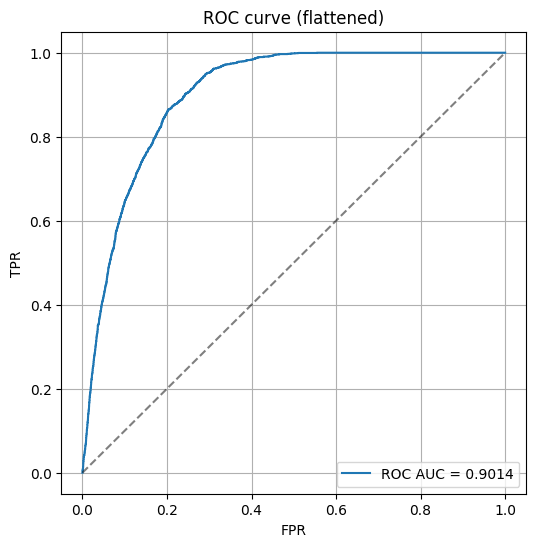

Validation max profit mean = 10.3600, median = 9.0000


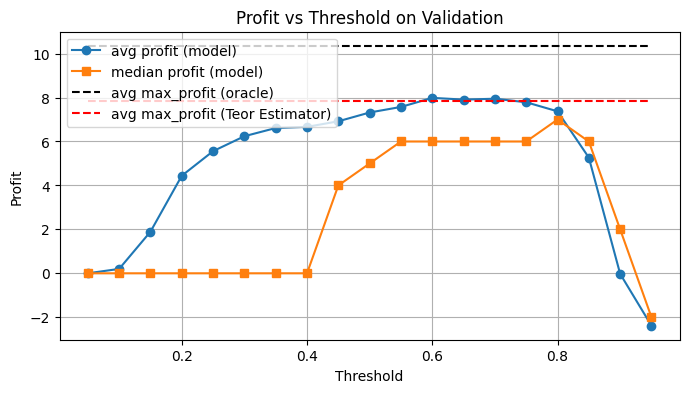

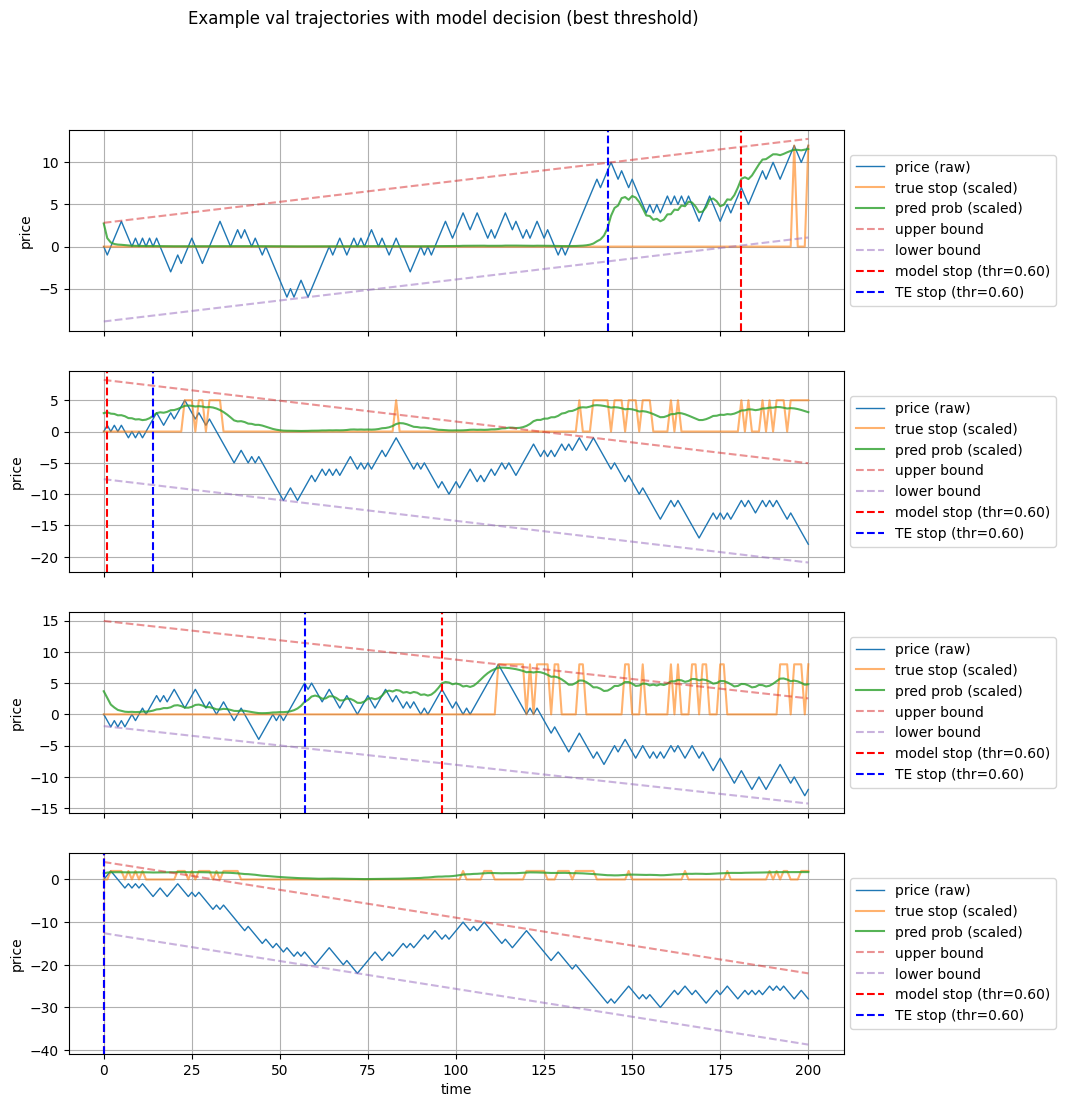

Done.


In [102]:
main(storage)

In [15]:
storage.thresholds[11]

np.float64(0.6)

In [44]:
print(f"model_avg={storage.avg_profits[11]}, model_med={storage.med_profits[11]}, theor_mean={storage.teor_est_profit.mean()}, oracle_mean={storage.max_profits.mean()}")

model_avg=11.506666666666666, model_med=10.0, theor_mean=11.0, oracle_mean=14.800000190734863


In [73]:
X, Y, POS = build_dataset2(5000, 200, 2, 1, 0, -1)

In [74]:
len(X)

576